In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.width", 55)
import seaborn as sns
import matplotlib.pyplot as plt

df_raw = pd.read_csv(r"C:\Users\Gillian  Zaragosa\Documents\PythonProjects\ts-hybrid-forecasting-model\evaluations\xgb_rf_ridge\mape.csv")
df_raw

,fname,xgb,rf,ridge,xgb_rf_ridge
0,time_series-PG-1day.csv,4.431932e-02,2.839769e-02,1.891236e-02,2.821446e-02
1,apparent_temperature_mean-2024-10-08.csv,3.566842e-02,3.897567e-02,3.750434e-02,3.750198e-02
2,time_series-CSCO-1day.csv,2.041467e-02,1.684287e-02,1.830236e-02,1.586461e-02
3,time_series-NEE-1day.csv,6.198937e-02,2.925661e-02,2.836043e-02,3.916728e-02
4,time_series-TEL-1day.csv,2.427356e-02,2.056344e-02,2.705543e-02,2.210109e-02
5,time_series-META-1day.csv,3.062632e-01,3.241400e-01,5.910171e-02,3.219274e-01
6,time_series-SM-1day.csv,8.652545e-02,7.291918e-02,5.889844e-02,6.769441e-02
7,time_series-KO-1day.csv,1.392331e-02,1.187520e-02,1.136513e-02,1.182872e-02
8,time_series-UNH-1day.csv,2.078053e-02,2.034456e-02,2.072149e-02,2.098308e-02
9,time_series-ADBE-1day.csv,4.719860e-02,4.700316e-02,3.342778e-02,4.917659e-02


In [2]:
df = df_raw.copy(deep=True)
df = df.drop(columns="fname", axis=1)
df

,xgb,rf,ridge,xgb_rf_ridge
0,4.431932e-02,2.839769e-02,1.891236e-02,2.821446e-02
1,3.566842e-02,3.897567e-02,3.750434e-02,3.750198e-02
2,2.041467e-02,1.684287e-02,1.830236e-02,1.586461e-02
3,6.198937e-02,2.925661e-02,2.836043e-02,3.916728e-02
4,2.427356e-02,2.056344e-02,2.705543e-02,2.210109e-02
5,3.062632e-01,3.241400e-01,5.910171e-02,3.219274e-01
6,8.652545e-02,7.291918e-02,5.889844e-02,6.769441e-02
7,1.392331e-02,1.187520e-02,1.136513e-02,1.182872e-02
8,2.078053e-02,2.034456e-02,2.072149e-02,2.098308e-02
9,4.719860e-02,4.700316e-02,3.342778e-02,4.917659e-02


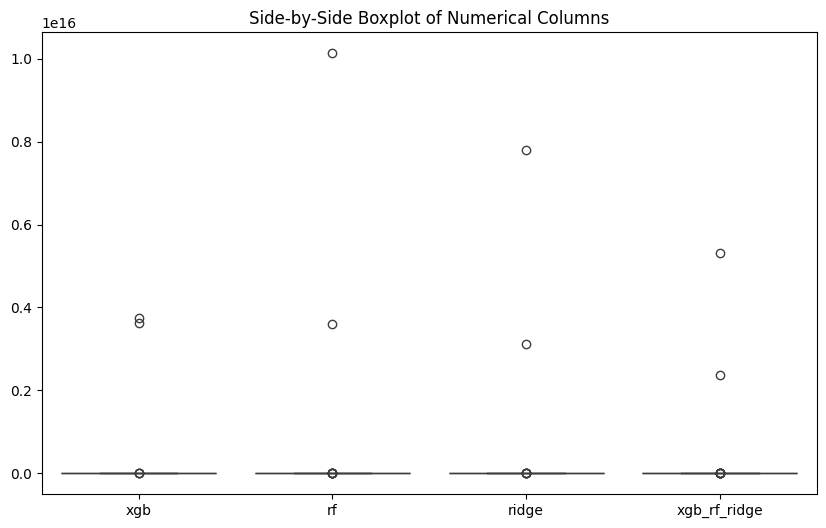

In [3]:
# Assuming df is your dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

# Show the plot
plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

In [8]:
import pandas as pd


# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df):
    df = df.copy(deep=True)
    for col in df.select_dtypes(
        include="number"
    ).columns:  # Loop through each numerical column
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where the value in this column is an outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df


# Assuming df is your original DataFrame
df_clean = remove_outliers_iqr(df)
df_clean

,xgb,rf,ridge,xgb_rf_ridge
0,0.044319,0.028398,0.018912,0.028214
1,0.035668,0.038976,0.037504,0.037502
2,0.020415,0.016843,0.018302,0.015865
3,0.061989,0.029257,0.028360,0.039167
4,0.024274,0.020563,0.027055,0.022101
7,0.013923,0.011875,0.011365,0.011829
8,0.020781,0.020345,0.020721,0.020983
9,0.047199,0.047003,0.033428,0.049177
10,0.036902,0.025632,0.021985,0.024963
12,0.023036,0.022648,0.025163,0.023253


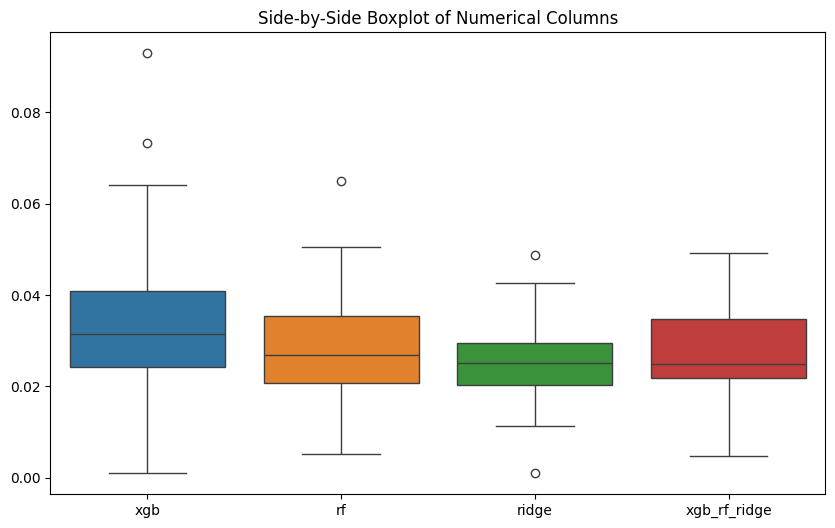

In [9]:
# Assuming df is your dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean)

# Show the plot
plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

In [7]:
len(df_clean)

33